### Import neccassary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from classes.import_data import package_directory, parameters
from classes.import_data import import_pkl_data
from classes.scenario_plots import sc_plot, PlotDropDown, HeatmapDropDown, InteractivePrice
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Identify the actual path of this jupyter file

In [2]:
PACKAGEDIR = package_directory()
print(PACKAGEDIR)
print(pd.__version__)
print(pd.__file__)
print(np.__version__)
print(np.__file__)

c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt
1.5.3
c:\Python397\lib\site-packages\pandas\__init__.py
1.20.3
c:\Python397\lib\site-packages\numpy\__init__.py


### Import data

In [3]:
import_pkl = import_pkl_data()
data = import_pkl.combined_data()
print(data)

       domain             Country  Year       for  ForStock
0     ForArea             Algeria  2017    1430.0     128.0
1     ForArea              Angola  2017   57624.0    2251.0
2     ForArea               Benin  2017    4220.0     166.0
3     ForArea            Botswana  2017   10547.0     761.0
4     ForArea        Burkina Faso  2017    5246.0     247.0
...       ...                 ...   ...       ...       ...
1975  ForArea  Russian Federation  2065  869182.1   86207.6
1976  ForArea          Tajikistan  2065     471.6       0.0
1977  ForArea        Turkmenistan  2065    4661.7      21.1
1978  ForArea             Ukraine  2065   12499.1    5608.6
1979  ForArea          Uzbekistan  2065    3772.0     127.9

[1980 rows x 5 columns]


c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt\classes\import_data.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_gfpm[parameters.column_name_scenario.value]= 'world500'


{'Forest':       RegionCode  Period   ForStock   ForArea       FGDPCap     alpha  \
0             a0       0         46      1940      4027.502 -0.002767   
1             a0       0         46      1940      4027.502 -0.002767   
2             a0       0         46      1940      4027.502 -0.002767   
3             a0       0         46      1940      4027.502 -0.002767   
4             a0       0         46      1940      4027.502 -0.002767   
...          ...     ...        ...       ...           ...       ...   
35995         r9       9  27.700925  10.83848  11850.455505 -0.004052   
35996         r9       9  27.700925  10.83848  11850.455505 -0.004052   
35997         r9       9  27.700925  10.83848  11850.455505 -0.004052   
35998         r9       9  27.700925  10.83848  11850.455505 -0.004052   
35999         r9       9  27.700925  10.83848  11850.455505 -0.004052   

          gamma        ga   gu  supply_from_forest CO2Price  \
0      0.011213       NaN  NaN                 Na

### Plot predefined scenario results 

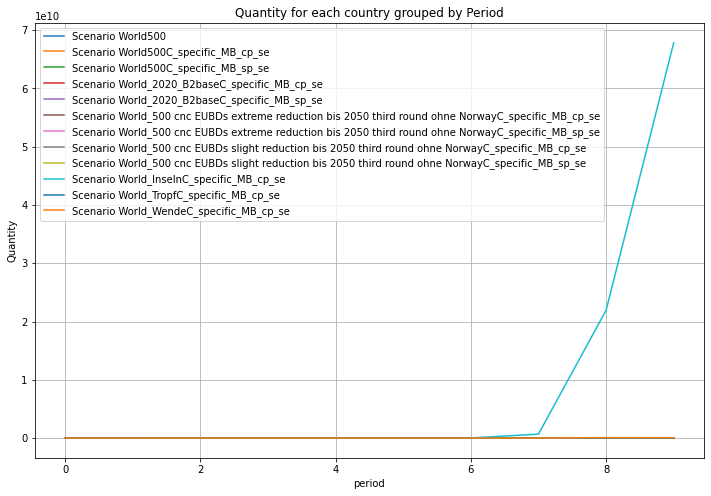

In [4]:
data = data["data_periods"]
sc_plot = sc_plot()
sc_plot.predefined_plot(data)

### Interactive scenario results (quantities)

In [5]:
plot_dropdown_instance = PlotDropDown(data)
#plot_dropdown_instance.update_plot_data(region=plot_dropdown_instance.regioncode_dropdown.value,
#                                        model=plot_dropdown_instance.model_dropdown.value,
#                                        id=plot_dropdown_instance.id_dropdown.value,
#                                        domain=plot_dropdown_instance.domain_dropdown.value,
#                                        commodity=plot_dropdown_instance.commodity_code_dropdown.value)

interactive(children=(Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4'…

### Interactive scenario results (prices)

In [6]:
price_interactive = InteractivePrice(data)




Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a…

Dropdown(description='Select Model:', options=('Alle', 'GFPMpt', 'GFPM'), value='Alle')

Dropdown(description='Select ID:', options=('Alle', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0), value='Alle')

Dropdown(description='Select Domain:', options=('Alle', 'Demand', 'TransportationExport', 'TransportationImpor…

Dropdown(description='Select CommodityCode:', options=('Alle', 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0,…

Output()

Output()

### Interactive Heatmap

In [8]:
data_selection = data#['data_periods']

heatmap_dropdown_instance = HeatmapDropDown(data=data_selection)
heatmap_dropdown_instance.update_heatmap_data(reference_data=heatmap_dropdown_instance.reference_data_dropdown.value,
                                              validation_data=heatmap_dropdown_instance.validation_data_dropdown.value,
                                              comparator=heatmap_dropdown_instance.comparator_dropdown.value,
                                              region=heatmap_dropdown_instance.regioncode_dropdown.value,
                                              commodity=heatmap_dropdown_instance.regioncode_dropdown.value,
                                              domain=heatmap_dropdown_instance.domain_dropdown.value
                                              )

NameError: name 'data' is not defined

In [11]:
import_pkl = import_pkl_data()
data = import_pkl.combined_data()
forest_data = data['Forest']
country_data = import_pkl.read_country_data()
forest_data_world = import_pkl.read_forest_data_gfpm(country_data=country_data)
forest_data = forest_data[forest_data_world.columns]
forest_data = pd.concat([forest_data, forest_data_world], axis= 0)
print(forest_data)
forest_data.to_csv('complete_forest_data.csv')

       domain             Country  Year       for  ForStock
0     ForArea             Algeria  2017    1430.0     128.0
1     ForArea              Angola  2017   57624.0    2251.0
2     ForArea               Benin  2017    4220.0     166.0
3     ForArea            Botswana  2017   10547.0     761.0
4     ForArea        Burkina Faso  2017    5246.0     247.0
...       ...                 ...   ...       ...       ...
1975  ForArea  Russian Federation  2065  869182.1   86207.6
1976  ForArea          Tajikistan  2065     471.6       0.0
1977  ForArea        Turkmenistan  2065    4661.7      21.1
1978  ForArea             Ukraine  2065   12499.1    5608.6
1979  ForArea          Uzbekistan  2065    3772.0     127.9

[1980 rows x 5 columns]


c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt\classes\import_data.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_gfpm[parameters.column_name_scenario.value]= 'world500'


       domain             Country  Year       for  ForStock
0     ForArea             Algeria  2017    1430.0     128.0
1     ForArea              Angola  2017   57624.0    2251.0
2     ForArea               Benin  2017    4220.0     166.0
3     ForArea            Botswana  2017   10547.0     761.0
4     ForArea        Burkina Faso  2017    5246.0     247.0
...       ...                 ...   ...       ...       ...
1975  ForArea  Russian Federation  2065  869182.1   86207.6
1976  ForArea          Tajikistan  2065     471.6       0.0
1977  ForArea        Turkmenistan  2065    4661.7      21.1
1978  ForArea             Ukraine  2065   12499.1    5608.6
1979  ForArea          Uzbekistan  2065    3772.0     127.9

[1980 rows x 5 columns]
     RegionCode  Period ForStock ForArea                     Scenario
0            a0       0       46    1940  World500C_specific_MB_cp_se
1            a0       0       46    1940  World500C_specific_MB_cp_se
2            a0       0       46    1940  Wor

c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt\classes\import_data.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_gfpm[parameters.column_name_scenario.value]= 'world500'


     RegionCode  Period ForStock ForArea                     Scenario
0            a0       0       46    1940  World500C_specific_MB_cp_se
1            a0       0       46    1940  World500C_specific_MB_cp_se
2            a0       0       46    1940  World500C_specific_MB_cp_se
3            a0       0       46    1940  World500C_specific_MB_cp_se
4            a0       0       46    1940  World500C_specific_MB_cp_se
...         ...     ...      ...     ...                          ...
1953         r9       6     73.2  3455.5                     world500
1954         r9       7     84.9  3530.9                     world500
1955         r9       8     97.8  3608.9                     world500
1956         r9       9    112.1  3689.3                     world500
1957         r9      10    127.9  3772.0                     world500

[325958 rows x 5 columns]


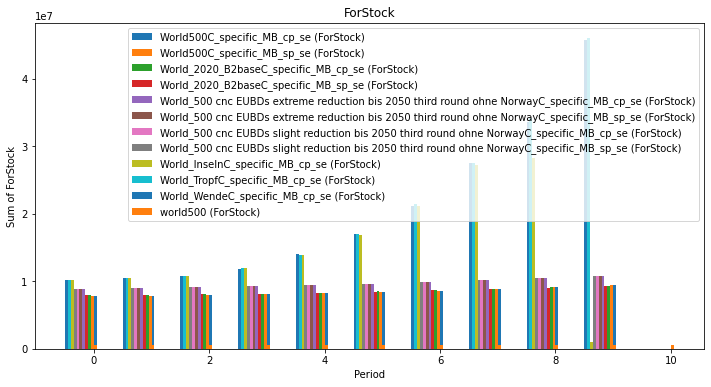

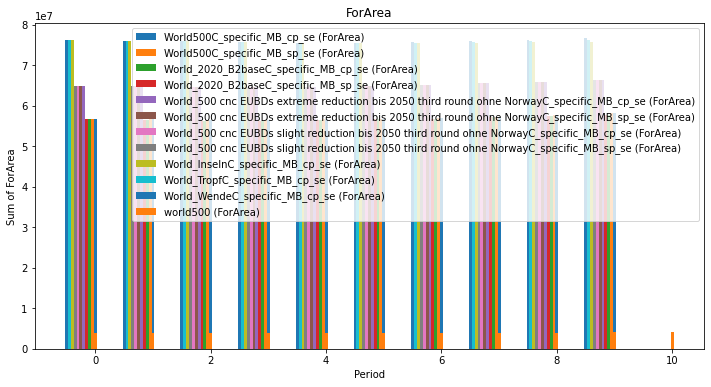

In [12]:
class ForestData:
    def __init__(self, data):
        self.data = forest_data

    def print_forest(self):
        print(self.data)

    def drop_duplicates(self):
        self.data = self.data.drop_duplicates().reset_index(drop=True)

    def plot_stock_area_diagrams(self):
        scenarios = self.data['Scenario'].unique()
        total_periods = self.data['Period'].unique()

        plt.figure(figsize=(12, 6))
        bar_width = 0.05
        bar_gap = -0.55
        for i, scenario in enumerate(scenarios):
            scenario_name = self.data[self.data['Scenario'] == scenario]
            total_stock = scenario_name.groupby('Period')['ForStock'].sum()

            
            periods_runner = total_stock.index.intersection(total_periods)
            bar_positions = np.arange(len(periods_runner)) + i * (len(periods_runner) * bar_width + bar_gap)
            plt.bar(bar_positions, total_stock[periods_runner], label=f'{scenario} (ForStock)', width=bar_width, align='edge')

        #plt.ylim(ymin=3e6)
        plt.xlabel('Period')
        plt.ylabel('Sum of ForStock')
        plt.legend()
        plt.title('ForStock')
        plt.show()

        plt.figure(figsize=(12, 6))
        for i, scenario in enumerate(scenarios):
            scenario_name = self.data[self.data['Scenario'] == scenario]
            total_area = scenario_name.groupby('Period')['ForArea'].sum()

         
            periods_runner = total_area.index.intersection(total_periods)
            bar_positions = np.arange(len(periods_runner)) + i * (len(periods_runner) * bar_width + bar_gap)
            plt.bar(bar_positions, total_area[periods_runner], label=f'{scenario} (ForArea)', width=bar_width)

        #plt.ylim(ymin=3e7)
        plt.xlabel('Period')
        plt.ylabel('Sum of ForArea')
        plt.legend()
        plt.title('ForArea')
        plt.show()


data_container = data
forest_plot = ForestData(data_container)
forest_plot.print_forest()
forest_plot.plot_stock_area_diagrams()

    